### Imports

In [1]:
import cartoframes
import pathways
from cartoframes.viz import Map, Layer, color_category_style
from pathways.auth import set_default_credentials
from pathways.catalog import search

In [2]:
cartoframes.utils.setup_metrics(False)

### Setting up Pathways client

In [3]:
#set_default_credentials('creds.json')

In [4]:
datasets = search('air')
datasets

,Id,Name,DisplayName,GeometryType
0,df622c9f-9d42-4531-849b-274a1deaeef5,Air Monitoring Stations,Air Monitoring Stations,Point
1,914f7d99-f43b-4f32-978d-fa249b695199,Airports,Airports,Point
2,5799c00c-2b11-4d59-bd63-6dbaf0a3105f,Carbon Monoxide Air Pollution,Air Pollution Carbon Monoxide,Polygon
3,c70c7f28-e239-42c3-ab37-ecafa750864c,Particulate Matter Air Pollution,Air Pollution Particulate Matter,Polygon


In [5]:
airports_df = pathways.read_dataset('914f7d99-f43b-4f32-978d-fa249b695199')

downloading from pathways:: 16.4kB [00:00, 109kB/s]                                                                    


In [6]:
Map(Layer(airports_df))

In [7]:
from pathways.display import display_info
display_info(airports_df)

In [8]:
datasets = search('crash')
datasets

,Id,Name,DisplayName,GeometryType
0,b17eb08a-a20a-447c-8bf1-bbcd83a79fd8,Crash,Crash,LrsPoint


In [9]:
crash_df = pathways.read_dataset('b17eb08a-a20a-447c-8bf1-bbcd83a79fd8')
crash_df

downloading from pathways:: 135MB [01:16, 1.78MB/s]                                                                    


,RTE_NM,MEASURE,DOCUMENT_NBR,CRASH_YEAR,CRASH_SEVERITY,DRIVER_VEHICLENUMBER,DRIVER_INJURYTYPE,DRIVER_AGE,DRIVER_GENDER,DRIVER_ACTION_TYPE_CD,...,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,ROUTE_OR_STREET_NM,RNS_MP,NODE,OFFSET,LAT,LON,geometry
0,None,NaN,141990099,2014,O,1,None,None,n/a,40. Fail to Maintain Proper Control,...,0,23,HAMP,600 BLK DUDLEY AVE,NaN,None,NaN,36.942450,-76.251330,None
1,R-VA IS00395NB,10.020859,140755106,2014,O,1;2,PDO;PDO,39;30,Male;Male,12. Following Too Close;1. No Improper Action,...,0,8,NOVA,I-395 NORTHBOUND,9.97,None,NaN,38.867131,-77.048510,POINT (-8577000.182 4702657.611)
2,R-VA US00050EB,69.271604,141770061,2014,O,1;2,PDO;PDO,26;33,Female;Male,40. Fail to Maintain Proper Control;1. No Impr...,...,0,8,NOVA,RT 50 LEE JACKSON MEM HWY,69.16,278765,1584.0,38.862477,-77.349005,POINT (-8610583.720 4702060.429)
3,R-VA US00250EB,165.959868,141050108,2014,O,1;2,PDO;PDO,35;56,Male;Female,1. No Improper Action;1. No Improper Action,...,2,15,RICH,N 1ST ST,165.98,210117,95.0,37.545060,-77.441104,POINT (-8620718.910 4515366.995)
4,R-VA134UR00014SB,1.890508,143175050,2014,O,1;2,PDO;PDO,40;50,Male;Female,12. Following Too Close;1. No Improper Action,...,0,23,HAMP,600 LYNNHAVEN PARKWAY,1.92,541296,1843.0,36.821662,-76.067074,POINT (-8467748.091 4414280.873)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858614,S-VA053PR SENECA SQ,0.110250,210535218,2021,O,1;2,PDO;PDO,19,Male; n/a,40. Fail to Maintain Proper Control; n/a,...,0,8,NOVA,SENECA SQUARE,0.11,None,NaN,39.055380,-77.468894,POINT (-8623800.555 4729602.981)
858615,R-VA IS00064WB RMP265.00B,0.169806,210765141,2021,A,1,A,34,Female,40. Fail to Maintain Proper Control,...,1,23,HAMP,LASALLE AVE,0.17,253029,127.0,37.034449,-76.361254,POINT (-8500510.031 4443910.001)
858616,R-VA IS00064EB,280.102015,210775126,2021,O,1;2,PDO;PDO,20;21,Male;Male,12. Following Too Close;1. No Improper Action,...,0,23,HAMP,I-64 EAST,279.74,None,NaN,36.892978,-76.232320,POINT (-8486405.178 4424989.333)
858617,R-VA076SC02125NB,1.131182,210625063,2021,O,1;2,PDO;PDO,18,Female; n/a,1. No Improper Action; n/a,...,0,8,NOVA,COLBY DRIVE 2125,1.12,548298,348.0,38.682482,-77.282984,POINT (-8603101.651 4676283.836)


In [10]:
display_info(crash_df)

In [11]:
crash_df.dtypes

RTE_NM              object
MEASURE            float64
DOCUMENT_NBR         int64
CRASH_YEAR          object
CRASH_SEVERITY      object
                    ...   
NODE                object
OFFSET             float64
LAT                float64
LON                float64
geometry          geometry
Length: 152, dtype: object

In [12]:
crash_df.groupby(['RTE_NM']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)

,RTE_NM,counts
913,R-VA IS00095NB,18285
1024,R-VA IS00095SB,18219
324,R-VA IS00064EB,14977
452,R-VA IS00064WB,14577
3066,R-VA US00001NB,9170
...,...,...
31514,S-VA000PR N JACKSONVILLE ST,1
11562,R-VA029SC02640WB,1
31512,S-VA000PR N IVY ST,1
31511,S-VA000PR N IVANHOE ST,1


In [13]:
subset_crash_df = crash_df[(crash_df.RTE_NM.str.fullmatch("R-VA   IS00095NB", na=False))]
subset_crash_df

,RTE_NM,MEASURE,DOCUMENT_NBR,CRASH_YEAR,CRASH_SEVERITY,DRIVER_VEHICLENUMBER,DRIVER_INJURYTYPE,DRIVER_AGE,DRIVER_GENDER,DRIVER_ACTION_TYPE_CD,...,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,ROUTE_OR_STREET_NM,RNS_MP,NODE,OFFSET,LAT,LON,geometry
26,R-VA IS00095NB,59.360707,142525080,2014,O,1,PDO,19,Female,40. Fail to Maintain Proper Control,...,0,"15,19",TCAT,I 95 NB AT 60MM,59.93,None,NaN,37.333979,-77.401894,POINT (-8616336.300 4485755.253)
132,R-VA IS00095NB,123.286454,142355033,2014,B,1;2,PDO;PDO,25;35,Female;Male,12. Following Too Close;1. No Improper Action,...,0,16,FRED,I-95,123.80,None,NaN,38.204732,-77.498241,POINT (-8627063.986 4608391.181)
141,R-VA IS00095NB,98.813927,141505056,2014,O,1;2,PDO;PDO,27;21,Female;Female,1. No Improper Action;12. Following Too Close,...,0,15,RICH,NORTHBOUND I-95,99.47,None,NaN,37.864037,-77.453062,POINT (-8622035.374 4560238.668)
245,R-VA IS00095NB,84.596003,140255113,2014,O,1,PDO,18,Male,40. Fail to Maintain Proper Control,...,0,15,RICH,I - 95 NORTHBOUND,85.25,None,NaN,37.662801,-77.448475,POINT (-8621523.971 4531900.929)
288,R-VA IS00095NB,129.925627,142255032,2014,O,1,PDO,39,Female,31. Avoiding Other Vehicle,...,0,16,FRED,I-95 NORTH,130.37,None,NaN,38.295558,-77.505369,POINT (-8627857.444 4621265.212)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858408,R-VA IS00095NB,174.436827,210205137,2021,C,1;2,C;C,27;23,Male;Male,12. Following Too Close;1. No Improper Action,...,0,8,NOVA,EB INTERSTATE 495,174.44,None,NaN,38.802695,-77.106741,POINT (-8583638.133 4693417.930)
858413,R-VA IS00095NB,143.365050,210415250,2021,C,1;2;3,PDO;C;NA,18;62,Female;Female; n/a,37. Other;42. Improper or Unsafe Lane Change;1...,...,0,16,FRED,INTERSTATE 95,143.74,None,NaN,38.464666,-77.407478,POINT (-8616958.428 4645285.206)
858446,R-VA IS00095NB,116.492037,210505107,2021,O,1,PDO,20,Male,3. Exceeded Safe Speed But Not Speed Limit,...,0,16,FRED,I-95 NORTHBOUND,117.07,None,NaN,38.109355,-77.517790,POINT (-8629241.008 4594889.656)
858607,R-VA IS00095NB,167.761859,210495366,2021,B,1,B,37,Male,40. Fail to Maintain Proper Control,...,0,8,NOVA,NB I-95,168.06,None,NaN,38.750969,-77.184471,POINT (-8592135.005 4686067.237)


In [14]:
Map(Layer(subset_crash_df))

In [15]:
Map(Layer(subset_crash_df, color_category_style('CRASH_SEVERITY')))

<AxesSubplot:xlabel='RNS_MP', ylabel='Count'>

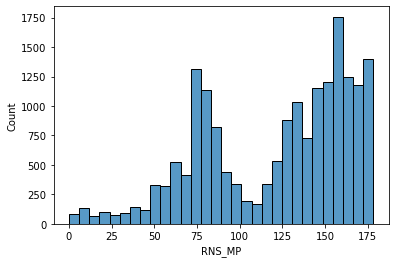

In [16]:
import seaborn as sns

# Plot the histogram thanks to the distplot function
sns.histplot(data=subset_crash_df, x="RNS_MP")

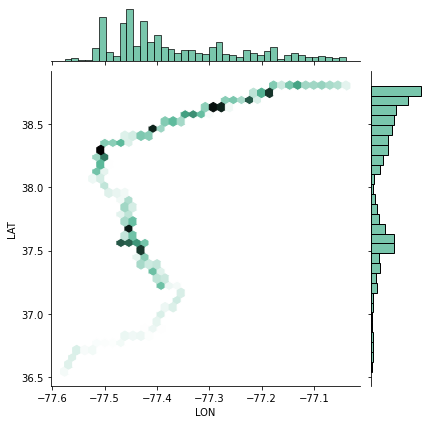

In [17]:
sns.jointplot(x=subset_crash_df.LON, y=subset_crash_df.LAT, kind="hex", color="#4CB391")

In [18]:
<AxesSubplot:xlabel='K_People', ylabel='Count'>

SyntaxError: invalid syntax (Temp/ipykernel_12840/2884481075.py, line 1)

In [ ]:
sns.histplot(data=subset_crash_df, x="K_PEOPLE")

In [ ]:
import seaborn as sns

sns.histplot(data=subset_crash_df, x="K_PEOPLE")

In [ ]:
subset_crash_df = crash_df[(crash_df.RTE_NM.str.fullmatch("R-VA   IS00095NB", na=False))]
subset_crash_df


In [19]:
display_info(crash_df)


<AxesSubplot:xlabel='K_PEOPLE', ylabel='Count'>

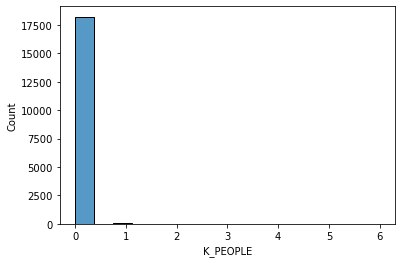

In [20]:
import seaborn as sns

# Plot the histogram thanks to the distplot function
sns.histplot(data=subset_crash_df, x="K_PEOPLE")

<AxesSubplot:xlabel='A_PEOPLE', ylabel='Count'>

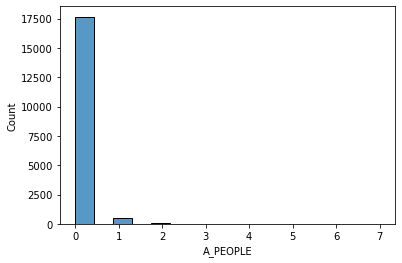

In [21]:
import seaborn as sns

# Plot the histogram thanks to the distplot function
sns.histplot(data=subset_crash_df, x="A_PEOPLE")